In [2]:
using DataFrames
using Plots
using Statistics
using Polynomials
using ChebyshevApprox
using TaylorSeries
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end



better_multiplication (generic function with 1 method)

In [3]:
A =[
    1 2
    2 3
    ] 
B = [
    1 5
    6 2
]
naive_multiplication(A,B)
better_multiplication(A,B)
A*B

pomiary=DataFrame()
dim = 50:50:1000
pomiary.wymiary = [rand() for _ in 1:size(dim)[1]*10]
pomiary.naive = [rand() for _ in 1:size(dim)[1]*10]
pomiary.better = [rand() for _ in 1:size(dim)[1]*10]
pomiary.blas = [rand() for _ in 1:size(dim)[1]*10]
for w in dim
    for j in 1:10
        A=[[rand() for i in 1:w] for _ in 1:w]
        B=[[rand() for i in 1:w] for _ in 1:w]
        pomiary.wymiary[convert(Int64,(w-50)/5) + j] = w 
        pomiary.naive[convert(Int64,(w-50)/5) + j] = @elapsed naive_multiplication(hcat(A...),hcat(B...))
        pomiary.better[convert(Int64,(w-50)/5) + j] = @elapsed better_multiplication(hcat(A...),hcat(B...))
        pomiary.blas[convert(Int64,(w-50)/5) + j] = @elapsed hcat(A...)*hcat(B...)
    end
end
pomiary

,wymiary,naive,better,blas
,Float64,Float64,Float64,Float64
1,50.0,0.0892749,0.0224446,0.656773
2,50.0,0.000266099,0.0002068,2.28e-5
3,50.0,0.0002513,0.000203699,1.89e-5
4,50.0,0.0002563,0.000204799,2.68e-5
5,50.0,0.0002592,0.000202899,1.8801e-5
6,50.0,0.0002531,0.0002026,1.91e-5
7,50.0,0.0002577,0.000215,4.09e-5
8,50.0,0.000273401,0.0003326,7.6901e-5
9,50.0,0.0002936,0.0002277,4.62e-5


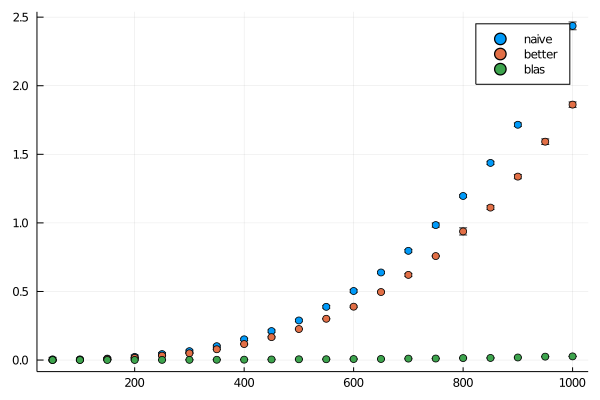

In [17]:
grouped =groupby(pomiary, :wymiary)
avrg = combine(grouped, "naive" => mean , "better" => mean , "blas" => mean )
stand = combine(grouped, "naive" => std , "better" => std , "blas" => std )
scatter(avrg.wymiary , avrg.naive_mean , yerr=stand.naive_std , label="naive")
scatter!(avrg.wymiary , avrg.better_mean , yerr=stand.better_std, label="better")
scatter!(avrg.wymiary , avrg.blas_mean , yerr=stand.blas_std, label="blas")

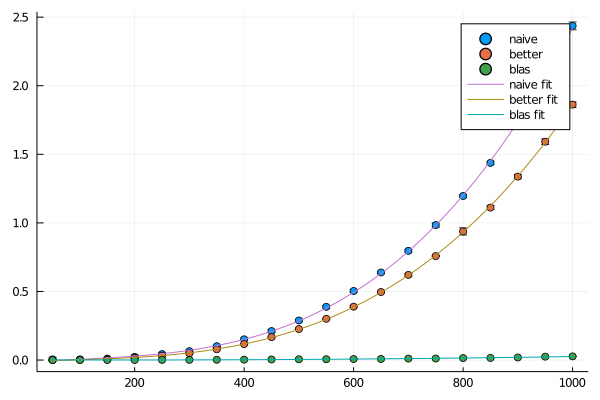

In [26]:
naive_fit = fit(avrg.wymiary,avrg.naive_mean , 3)
better_fit = fit(avrg.wymiary,avrg.better_mean , 3)
blas_fit = fit(avrg.wymiary,avrg.blas_mean , 3)
scatter(avrg.wymiary , avrg.naive_mean , yerr=stand.naive_std , label="naive")
scatter!(avrg.wymiary , avrg.better_mean , yerr=stand.better_std, label="better")
scatter!(avrg.wymiary , avrg.blas_mean , yerr=stand.blas_std, label="blas")
plot!(naive_fit , extrema(avrg.wymiary)... , label="naive fit")
plot!(better_fit , extrema(avrg.wymiary)... , label="better fit")
plot!(blas_fit , extrema(avrg.wymiary)... , label="blas fit")

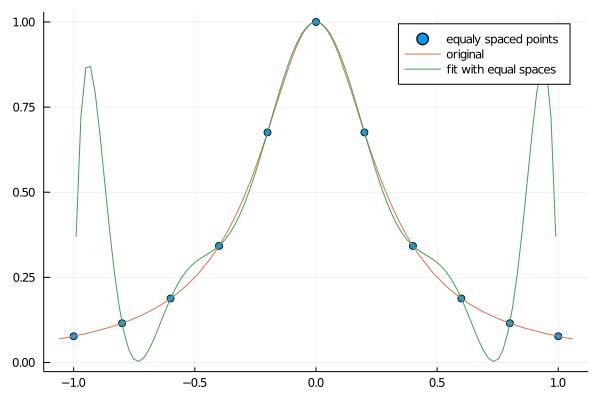

In [16]:
ye(x)= 1/(1+12*x^2)
d=[1,-1]
#nodes = chebyshev_nodes(11)
t11 = ChebyshevT([0, 0, 0,0,0,0,0,0,0,0,0,1])
nodes = Polynomials.roots(t11)
y=[ye(x) for x in nodes]
diff=2/10
nodes_eq=[-1+diff*i for i in 0:10]
y_eq=[ye(x) for x in nodes_eq]
f = fit(nodes,y)
f_eq=fit(nodes_eq,y_eq)
scatter(nodes_eq,y_eq,label="equaly spaced points")
plot!(ye,label="original")
plot!(f_eq,extrema(nodes)...,label="fit with equal spaces")



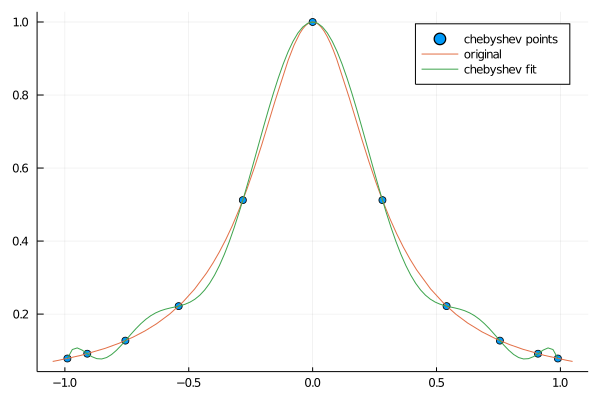

In [17]:
scatter(nodes,y,label="chebyshev points")
plot!(ye,label="original")
plot!(f,extrema(nodes)... , label="chebyshev fit")

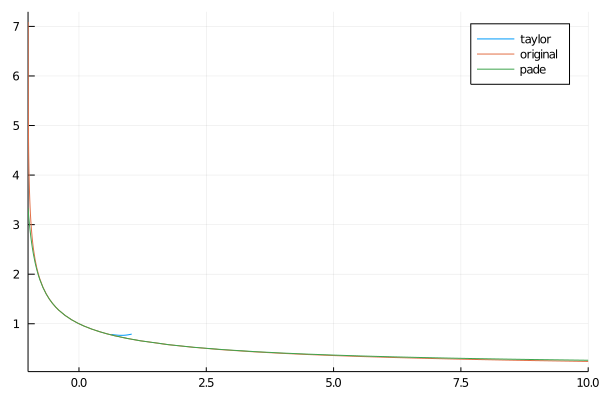

In [19]:
costa(x)=log(x+1)/x
t = Taylor1(Float64, 5)
sin_taylor = costa(t)
sin_t_pol = Polynomial(sin_taylor.coeffs)
sin_pade = Polynomials.PolyCompat.PadeApproximation.Pade(sin_t_pol, 2, 2)
myp(x) = sin_pade(x)
plot(sin_t_pol , label="taylor" , xlims = (-1,10))
plot!(costa ,  label="original" ,xlims = (-1,10))
plot!(myp , label="pade", xlims = (-1,10))

In [6]:
pomiary
using CSV
CSV.write("C:\\Users\\kacpe\\Desktop\\cos co jest mi potrzebne i guess\\monwit\\lab5\\pom_z_lab4.csv", pomiary)

"C:\\Users\\kacpe\\Desktop\\cos co jest mi potrzebne i guess\\monwit\\lab5\\pom_z_lab4.csv"